# Yolov5 cv section detection model

Mount Google Drive to access files and data stored in your Google Drive.

In [10]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


Change the current working directory to the yolov5 path on Google Drive.


In [11]:
%cd /content/gdrive/MyDrive/CVproject/yolov5-master

/content/gdrive/MyDrive/CVproject/yolov5-master


Train the YOLOv5 model with custom CV data.


In [7]:
!python train.py --device 0 --batch-size 16 --epochs 150 --img 640  --data data/cvdata.yaml --cfg models/yolov5m.yaml  --weights yolov5m.pt --name yolov5_cv_train
# - '--device 0': Specifies the GPU device to use for training (change if using a different GPU).
# - '--batch-size 16': Sets the batch size for training.
# - '--epochs 150': Specifies the number of training epochs.
# - '--img 640': Sets the input image size during training.
# - '--data data/cvdata.yaml': Points to the YAML configuration file containing dataset information.
# - '--cfg models/yolov5m.yaml': Specifies the YOLOv5 model architecture configuration file.
# - '--weights yolov5m.pt': Uses a pre-trained YOLOv5 model as a starting point.
# - '--name yolov5_cv_train': Names the training session for tracking and logs.

2023-12-19 18:50:20.041144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 18:50:20.041184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 18:50:20.042571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=models/yolov5m.yaml, data=data/cvdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=Fal

Run object detection on an image using the trained YOLOv5 model


In [12]:
!python detect.py --weights runs/train/yolov5_cv_train/weights/best.pt --conf 0.16 --img-size 640 --source cv.png

detect: weights=['runs/train/yolov5_cv_train/weights/best.pt'], source=cv.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.16, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-12-19 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20897385 parameters, 0 gradients, 48.0 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gdrive/MyDrive/CVproject/yolov5-master/cv.png: 640x480 3 Contacts, 3 Educations, 1 Name, 1 Picture, 1 Profil, 2 Skillss, 60.6ms
Speed: 0.7ms pre-process, 60.6ms inference, 649.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


Load the trained YOLOv5 model using PyTorch Hub


In [25]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/yolov5_cv_train/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20897385 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


Perform object detection on a specified image using the loaded YOLOv5 model.


image 1/1: 855x603 3 Contacts, 3 Educations, 1 Name, 1 Picture, 1 Profil, 2 Skillss
Speed: 17.9ms pre-process, 20.7ms inference, 1.5ms NMS per image at shape (1, 3, 640, 480)


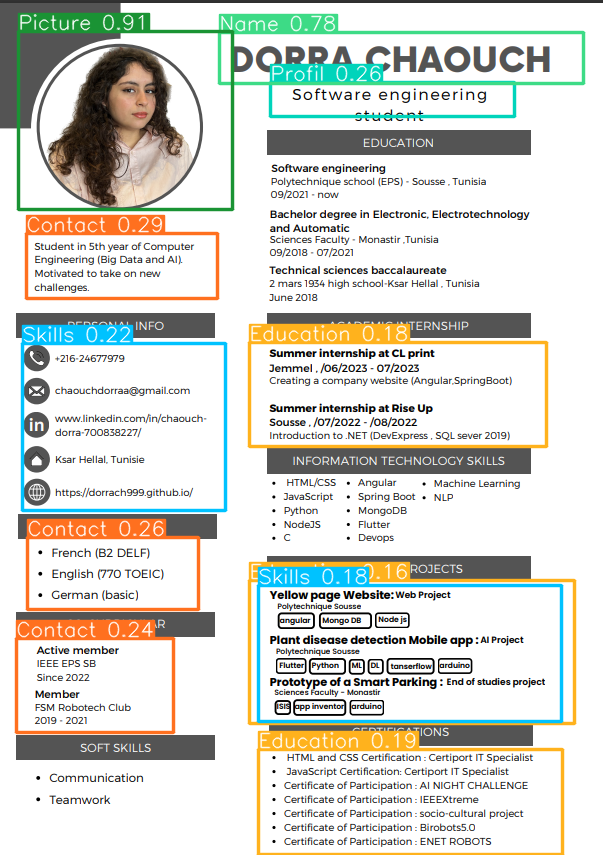

In [38]:
image='cv.png'
results = model(image)
print(results)
results.show()